# Working with Dates and Times in Python

### Libraries and datasets

In [9]:
from datetime import date, timedelta, datetime, timezone
from dateutil import tz
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import csv

with open('datasets/florida_hurricane_dates.pkl', 'rb') as file:
    florida_hurricane_dates = pickle.load(file)

with open('datasets/capital-onebike.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)
    onebike_datetimes = []
    onebike_datetime_strings = []
    for rows in reader:
        mydict = {'start':datetime.strptime(rows[0], '%Y-%m-%d %H:%M:%S'), 'end':datetime.strptime(rows[1], '%Y-%m-%d %H:%M:%S')}
        onebike_datetimes.append(mydict)

        tuple = (rows[0], rows[1])
        onebike_datetime_strings.append(tuple)

## 1. Dates and Calendars

### Which day of the week?
Instructions:
<ul>
<li>Import date from datetime.</li>
<li>Create a date object for August 24, 1992.</li>
<li>Now ask Python what day of the week Hurricane Andrew hit (remember that Python counts days of the week starting from Monday as 0, Tuesday as 1, and so on).</li>
</ul>

In [20]:
# Import date from datetime
from datetime import date
from datetime import datetime

# Create a date object
hurricane_andrew = date(1992, 8, 24)

# Which day of the week is the date?
print(hurricane_andrew.weekday())

0


### How many hurricanes come early?
Instructions:
<ul>
<li>Complete the for loop to iterate through florida_hurricane_dates.</li>
<li>Complete the if statement to increment the counter (early_hurricanes) if the hurricane made landfall before June.</li>
</ul>

In [4]:
# Counter for how many before June 1
early_hurricanes = 0

# We loop over the dates
for hurricane in florida_hurricane_dates:
  # Check if the month is before June (month number 6)
  if hurricane.month < 6:
    early_hurricanes = early_hurricanes + 1
    
print(early_hurricanes)

10


### Subtracting dates
Instructions:
<ul>
<li>Import date from datetime.</li>
<li>Create a date object for May 9th, 2007, and assign it to the start variable.</li>
<li>Create a date object for December 13th, 2007, and assign it to the end variable.</li>
<li>Subtract start from end, to print the number of days in the resulting timedelta object.</li>
</ul>

In [12]:
# Import date
from datetime import date

# Create a date object for May 9th, 2007
start = date(2007, 5, 9)

# Create a date object for December 13th, 2007
end = date(2007, 12, 13)

# Subtract the two dates and print the number of days
print((end - start).days)


218


### Counting events per calendar month
Instructions:
<ul>
<li>Within the for loop:</li>
<li>Assign month to be the month of that hurricane.</li>
<li>Increment hurricanes_each_month for the relevant month by 1.</li>
</ul>

In [14]:
# A dictionary to count hurricanes per calendar month
hurricanes_each_month = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6:0, 7: 0, 8:0, 9:0, 10:0, 11:0, 12:0}

# Loop over all hurricanes
for hurricane in florida_hurricane_dates:
  # Pull out the month
  month = hurricane.month
  # Increment the count in your dictionary by one
  hurricanes_each_month[month] += 1
  
print(hurricanes_each_month)

{1: 0, 2: 1, 3: 0, 4: 1, 5: 8, 6: 32, 7: 21, 8: 49, 9: 70, 10: 43, 11: 9, 12: 1}


### Putting a list of dates in order
Instructions:
<ul>
<li>Print the first and last dates in dates_scrambled.</li>
<li>Sort dates_scrambled using Python's built-in sorted() function, and save the results to dates_ordered.</li>
<li>Print the first and last dates in dates_ordered.</li>
</ul>

In [ ]:
# Print the first and last scrambled dates
print(dates_scrambled[0])
print(dates_scrambled[-1])

# Put the dates in order
dates_ordered = sorted(dates_scrambled)

# Print the first and last ordered dates
print(dates_ordered[0])
print(dates_ordered[-1])

### Printing dates in a friendly format
Instructions:
<ul>
<li>Assign the earliest date in florida_hurricane_dates to first_date.</li>
<li>Print first_date in the ISO standard. For example, December 1st, 2000 would be "2000-12-01".</li>
<li>Print first_date in the US style, using .strftime(). For example, December 1st, 2000 would be "12/1/2000".</li>
</ul>

In [15]:
# Assign the earliest date to first_date
first_date = min(florida_hurricane_dates)

# Convert to ISO and US formats
iso = "Our earliest hurricane date: " + first_date.isoformat()
us = "Our earliest hurricane date: " + first_date.strftime("%m/%d/%Y")

print("ISO: " + iso)
print("US: " + us)

ISO: Our earliest hurricane date: 1950-08-31
US: Our earliest hurricane date: 08/31/1950


### Representing dates in different ways
Instructions:
<ul>
<li>Print andrew in the format 'YYYY-MM'.</li>
<li>Print andrew in the format 'MONTH (YYYY)', using %B for the month's full name, which in this case will be August.</li>
<li>Print andrew in the format 'YYYY-DDD' (where DDD is the day of the year) using %j.</li>
</ul>

In [19]:
# Create a date object
andrew = date(1992, 8, 26)

# Print the date in the format 'YYYY-MM'
print(andrew.strftime('%Y-%m'))

# Print the date in the format 'MONTH (YYYY)'
print(andrew.strftime('%B (%Y)'))

# Print the date in the format 'YYYY-DDD'
print(andrew.strftime('%Y-%j'))

1992-08
August (1992)
1992-239


## 2. Combining Dates and Times

### Creating datetimes by hand
Instructions:
<ul>
<li>Import the datetime class.</li>
<li>Create a datetime for October 1, 2017 at 15:26:26.</li>
<li>Print the results in ISO format.</li>
<li>Import the datetime class.</li>
<li>Create a datetime for December 31, 2017 at 15:19:13.</li>
<li>Print the results in ISO format.</li>
<li>Create a new datetime by replacing the year in dt with 1917 (instead of 2017)</li>
</ul>

In [22]:
# Create a datetime object
dt = datetime(2017, 10, 1, 15, 26, 26)

# Print the results in ISO 8601 format
print(dt.isoformat())

# Create a datetime object
dt = datetime(2017, 12, 31, 15, 19, 13)

# Print the results in ISO 8601 format
print(dt.isoformat())

# Replace the year with 1917
dt_old = dt.replace(year=1917)

# Print the results in ISO 8601 format
print(dt_old)

2017-10-01T15:26:26
2017-12-31T15:19:13
1917-12-31 15:19:13


### Counting events before and after noon
Instructions:
<ul>
<li>Within the for loop, complete the if statement to check if the trip started before noon.</li>
<li>Within the for loop, increment trip_counts['AM'] if the trip started before noon, and trip_counts['PM'] if it started after noon.</li>
</ul>

In [52]:
# Create dictionary to hold results
trip_counts = {'AM': 0, 'PM': 0}
  
# Loop over all trips
for trip in onebike_datetimes:
  # Check to see if the trip starts before noon
  if trip['start'].hour < 12:
    # Increment the counter for before noon
    trip_counts['AM'] += 1
  else:
    # Increment the counter for after noon
    trip_counts['PM'] += 1
  
print(trip_counts)

{'AM': 94, 'PM': 196}


### Turning strings into datetimes
Instructions:
<ul>
<li>Determine the format needed to convert s to datetime and assign it to fmt.</li>
<li>Convert the string s to datetime using fmt.</li>
</ul>

In [6]:
# Starting string, in YYYY-MM-DD HH:MM:SS format
s = '2017-02-03 00:00:01'

# Write a format string to parse s
fmt = '%Y-%m-%d %H:%M:%S'

# Create a datetime object d
d = datetime.strptime(s, fmt)

# Print d
print(d)

# Starting string, in YYYY-MM-DD format
s = '2030-10-15'

# Write a format string to parse s
fmt = '%Y-%m-%d'

# Create a datetime object d
d = datetime.strptime(s, fmt)

# Print d
print(d)

# Starting string, in MM/DD/YYYY HH:MM:SS format
s = '12/15/1986 08:00:00'

# Write a format string to parse s
fmt = '%m/%d/%Y %H:%M:%S'

# Create a datetime object d
d = datetime.strptime(s, fmt)

# Print d
print(d)

2017-02-03 00:00:01
2030-10-15 00:00:00
1986-12-15 08:00:00


### Parsing pairs of strings as datetimes
Instructions:
<ul>
<li>Outside the for loop, fill out the fmt string with the correct parsing format for the data.</li>
<li>Within the for loop, parse the start and end strings into the trip dictionary with start and end keys and datetime objects for values.</li>
</ul>

In [15]:
# Write down the format string
fmt = "%Y-%m-%d %H:%M:%S"

# Initialize a list for holding the pairs of datetime objects
onebike_datetimes = []

# Loop over all trips
for (start, end) in onebike_datetime_strings:
  trip = {'start': datetime.strptime(start, fmt),
          'end': datetime.strptime(end, fmt)}
  
  # Append the trip
  onebike_datetimes.append(trip)

### Recreating ISO format with strftime()
Instructions:
<ul>
<li>Complete fmt to match the format of ISO 8601.</li>
<li>Print first_start with both .isoformat() and .strftime(); they should match.</li>
</ul>

In [16]:
# Pull out the start of the first trip
first_start = onebike_datetimes[0]['start']

# Format to feed to strftime()
fmt = "%Y-%m-%dT%H:%M:%S"

# Print out date with .isoformat(), then with .strftime() to compare
print(first_start.isoformat())
print(first_start.strftime(fmt))

2017-10-01T15:23:25
2017-10-01T15:23:25


### Unix timestamps
Instructions:
<ul>
<li>Complete the for loop to loop over timestamps.</li>
<li>Complete the code to turn each timestamp ts into a datetime.</li>
</ul>

In [17]:
# Starting timestamps
timestamps = [1514665153, 1514664543]

# Datetime objects
dts = []

# Loop
for ts in timestamps:
  dts.append(datetime.fromtimestamp(ts))
  
# Print results
print(dts)

[datetime.datetime(2017, 12, 30, 17, 19, 13), datetime.datetime(2017, 12, 30, 17, 9, 3)]


### Turning pairs of datetimes into durations
Instructions:
<ul>
<li>Within the loop:</li>
    <ul>
    <li>Use arithmetic on the start and end elements to find the length of the trip</li>
    <li>Save the results to trip_duration.</li>
    <li>Calculate trip_length_seconds from trip_duration.</li>
    </ul>
</ul>

In [2]:
# Initialize a list for all the trip durations
onebike_durations = []

for trip in onebike_datetimes:
  # Create a timedelta object corresponding to the length of the trip
  trip_duration = trip['end'] - trip['start']
  
  # Get the total elapsed seconds in trip_duration
  trip_length_seconds = trip_duration.total_seconds()
  
  # Append the results to our list
  onebike_durations.append(trip_length_seconds)

### Average trip time
Instructions:
<ul>
<li>Calculate total_elapsed_time across all trips in onebike_durations.</li>
<li>Calculate number_of_trips for onebike_durations.</li>
<li>Divide total_elapsed_time by number_of_trips to get the average trip length.</li>
</ul>

In [3]:
# What was the total duration of all trips?
total_elapsed_time = sum(onebike_durations)

# What was the total number of trips?
number_of_trips = len(onebike_durations)
  
# Divide the total duration by the number of trips
print(total_elapsed_time / number_of_trips)

1178.9310344827586


### The long and the short of why time is hard
Instructions:
<ul>
<li>Calculate shortest_trip from onebike_durations.</li>
<li>Calculate longest_trip from onebike_durations.</li>
<li>Print the results, turning shortest_trip and longest_trip into strings so they can print.</li>
</ul>

In [4]:
# Calculate shortest and longest trips
shortest_trip = min(onebike_durations)
longest_trip = max(onebike_durations)

# Print out the results
print("The shortest trip was " + str(shortest_trip) + " seconds")
print("The longest trip was " + str(longest_trip) + " seconds")

The shortest trip was -3346.0 seconds
The longest trip was 76913.0 seconds


## 3. Time Zones and Daylight Saving

### Creating timezone aware datetimes
Instructions:
<ul>
<li>Import timezone.</li>
<li>Set the tzinfo to UTC, without using timedelta.</li>
<li>Set pst to be a timezone set for UTC-8.</li>
<li>Set dt's timezone to be pst.</li>
<li>Set aedt to be a timezone set for UTC+11.</li>
<li>Set dt's timezone to be aedt.</li>
</ul>

In [3]:
# October 1, 2017 at 15:26:26, UTC
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=timezone.utc)

# Print results
print(dt.isoformat())

# Create a timezone for Pacific Standard Time, or UTC-8
pst = timezone(timedelta(hours=-8))

# October 1, 2017 at 15:26:26, UTC-8
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=pst)

# Print results
print(dt.isoformat())

# Create a timezone for Australian Eastern Daylight Time, or UTC+11
aedt = timezone(timedelta(hours=11))

# October 1, 2017 at 15:26:26, UTC+11
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=aedt)

# Print results
print(dt.isoformat())

2017-10-01T15:26:26+00:00
2017-10-01T15:26:26-08:00
2017-10-01T15:26:26+11:00


### Setting timezones
Instructions:
<ul>
<li>Create edt, a timezone object whose UTC offset is -4 hours.</li>
<li>Within the for loop:</li>
<li>Set the tzinfo for trip['start'].</li>
<li>Set the tzinfo for trip['end'].</li>
</ul>

In [4]:
# Create a timezone object corresponding to UTC-4
edt = timezone(timedelta(hours=-4))

# Loop over trips, updating the start and end datetimes to be in UTC-4
for trip in onebike_datetimes[:10]:
  # Update trip['start'] and trip['end']
  trip['start'] = trip['start'].replace(tzinfo=edt)
  trip['end'] = trip['end'].replace(tzinfo=edt)

### What time did the bike leave in UTC?
Instructions:
<ul>
<li>Within the for loop, move dt to be in UTC. Use timezone.utc as a convenient shortcut for UTC.</li>
</ul>

In [5]:
# Loop over the trips
for trip in onebike_datetimes[:10]:
  # Pull out the start
  dt = trip['start']
  # Move dt to be in UTC
  dt = dt.astimezone(timezone.utc)
  
  # Print the start time in UTC
  print('Original:', trip['start'], '| UTC:', dt.isoformat())

Original: 2017-10-01 15:23:25-04:00 | UTC: 2017-10-01T19:23:25+00:00
Original: 2017-10-01 15:42:57-04:00 | UTC: 2017-10-01T19:42:57+00:00
Original: 2017-10-02 06:37:10-04:00 | UTC: 2017-10-02T10:37:10+00:00
Original: 2017-10-02 08:56:45-04:00 | UTC: 2017-10-02T12:56:45+00:00
Original: 2017-10-02 18:23:48-04:00 | UTC: 2017-10-02T22:23:48+00:00
Original: 2017-10-02 18:48:08-04:00 | UTC: 2017-10-02T22:48:08+00:00
Original: 2017-10-02 19:18:10-04:00 | UTC: 2017-10-02T23:18:10+00:00
Original: 2017-10-02 19:37:32-04:00 | UTC: 2017-10-02T23:37:32+00:00
Original: 2017-10-03 08:24:16-04:00 | UTC: 2017-10-03T12:24:16+00:00
Original: 2017-10-03 18:17:07-04:00 | UTC: 2017-10-03T22:17:07+00:00


### Putting the bike trips into the right time zone
Instructions:
<ul>
<li>Import tz from dateutil.</li>
<li>Assign et to be the timezone 'America/New_York'.</li>
<li>Within the for loop, set start and end to have et as their timezone (use .replace()).</li>
</ul>

In [6]:
# Import tz
from dateutil import tz

# Create a timezone object for Eastern Time
et = tz.gettz('America/New_York')

# Loop over trips, updating the datetimes to be in Eastern Time
for trip in onebike_datetimes[:10]:
  # Update trip['start'] and trip['end']
  trip['start'] = trip['start'].replace(tzinfo=et)
  trip['end'] = trip['end'].replace(tzinfo=et)

### What time did the bike leave? (Global edition)
Instructions:
<ul>
<li>Set uk to be the timezone for the UK: 'Europe/London'.</li>
<li>Change local to be in the uk timezone and assign it to notlocal.</li>
<li>Set ist to be the timezone for India: 'Asia/Kolkata'.</li>
<li>Change local to be in the ist timezone and assign it to notlocal.</li>
<li>Set sm to be the timezone for Samoa: 'Pacific/Apia'.</li>
<li>Change local to be in the sm timezone and assign it to notlocal.</li>
</ul>

In [7]:
# Create the timezone object
uk = tz.gettz('Europe/London')

# Pull out the start of the first trip
local = onebike_datetimes[0]['start']

# What time was it in the UK?
notlocal = local.astimezone(tz=uk)

# Print them out and see the difference
print(local.isoformat())
print(notlocal.isoformat())

# Create the timezone object
ist = tz.gettz('Asia/Kolkata')

# Pull out the start of the first trip
local = onebike_datetimes[0]['start']

# What time was it in India?
notlocal = local.astimezone(tz=ist)

# Print them out and see the difference
print(local.isoformat())
print(notlocal.isoformat())

# Create the timezone object
sm = tz.gettz('Pacific/Apia')

# Pull out the start of the first trip
local = onebike_datetimes[0]['start']

# What time was it in Samoa?
notlocal = local.astimezone(tz=sm)

# Print them out and see the difference
print(local.isoformat())
print(notlocal.isoformat())

2017-10-01T15:23:25-04:00
2017-10-01T20:23:25+01:00
2017-10-01T15:23:25-04:00
2017-10-02T00:53:25+05:30
2017-10-01T15:23:25-04:00
2017-10-02T09:23:25+14:00


### How many hours elapsed around daylight saving?
Instructions:
<ul>

You already have a datetime called start, set for March 12, 2017 at midnight, set to the timezone 'America/New_York'.
<li>Add six hours to start and assign it to end. Look at the UTC offset for the two results.</li>

You added 6 hours, and got 6 AM, despite the fact that the clocks springing forward means only 5 hours would have actually elapsed!
<li>Calculate the time between start and end. How much time does Python think has elapsed?</li>
<li>Move your datetime objects into UTC and calculate the elapsed time again.</li>
<li>Once you're in UTC, what result do you get?</li>

</ul>

In [8]:
# Import datetime, timedelta, tz, timezone
from datetime import datetime, timedelta, timezone
from dateutil import tz

# Start on March 12, 2017, midnight, then add 6 hours
start = datetime(2017, 3, 12, tzinfo = tz.gettz('America/New_York'))
end = start + timedelta(hours=6)
print(start.isoformat() + " to " + end.isoformat())

# How many hours have elapsed?
print((end - start).total_seconds()/(60*60))

# What if we move to UTC?
print((end.astimezone(tz=timezone.utc) - start.astimezone(tz=timezone.utc))\
      .total_seconds()/(60*60))

2017-03-12T00:00:00-05:00 to 2017-03-12T06:00:00-04:00
6.0
5.0


### March 29, throughout a decade
Instructions:
<ul>
<li>Using tz, set the timezone for dt to be 'Europe/London'.</li>
<li>Within the for loop:</li>
<li>Use the .replace() method to change the year for dt to be y.</li>
<li>Call .isoformat() on the result to observe the results.</li>
</ul>

In [9]:
# Import datetime and tz
from datetime import datetime
from dateutil import tz

# Create starting date
dt = datetime(2000, 3, 29, tzinfo = tz.gettz('Europe/London'))

# Loop over the dates, replacing the year, and print the ISO timestamp
for y in range(2000, 2011):
  print(dt.replace(year=y).isoformat())

2000-03-29T00:00:00+01:00
2001-03-29T00:00:00+01:00
2002-03-29T00:00:00+00:00
2003-03-29T00:00:00+00:00
2004-03-29T00:00:00+01:00
2005-03-29T00:00:00+01:00
2006-03-29T00:00:00+01:00
2007-03-29T00:00:00+01:00
2008-03-29T00:00:00+00:00
2009-03-29T00:00:00+00:00
2010-03-29T00:00:00+01:00


### Finding ambiguous datetimes
Instructions:
<ul>
<li>Loop over the trips in onebike_datetimes:</li>
<li>Print any rides whose start is ambiguous.</li>
<li>Print any rides whose end is ambiguous.</li>
</ul>

In [ ]:
# Loop over trips
for trip in onebike_datetimes:
  # Rides with ambiguous start
  if tz.datetime_ambiguous(trip['start']):
    print("Ambiguous start at " + str(trip['start']))
  # Rides with ambiguous end
  if tz.datetime_ambiguous(trip['end']):
    print("Ambiguous end at " + str(trip['end']))

### Cleaning daylight saving data with fold
Instructions:
<ul>
<li>Complete the if statement to be true only when a ride's start comes after its end.</li>
<li>When start is after end, call tz.enfold() on the end so you know it refers to the one after the daylight savings time change.</li>
<li>After the if statement, convert the start and end to UTC so you can make a proper comparison.</li>
</ul>

In [11]:
trip_durations = []
for trip in onebike_datetimes:
  # When the start is later than the end, set the fold to be 1
  if trip['start'] > trip['end']:
    trip['end'] = tz.enfold(trip['end'])
  # Convert to UTC
  start = trip['start'].astimezone(tz=timezone.utc)
  end = trip['end'].astimezone(tz=timezone.utc)

  # Subtract the difference
  trip_length_seconds = (end-start).total_seconds()
  trip_durations.append(trip_length_seconds)

# Take the shortest trip duration
print("Shortest trip: " + str(min(trip_durations)))

Shortest trip: -3346.0


## 4. Easy and Powerful: Dates and Times in Pandas

### Loading a csv file in Pandas
Instructions:
<ul>
<li>Import Pandas.</li>
<li>Complete the call to read_csv() so that it correctly parses the date columns Start date and End date.</li>
</ul>

In [4]:
# Import pandas
import pandas as pd

# Load CSV into the rides variable
rides = pd.read_csv('datasets/capital-onebike.csv', 
                    parse_dates = ['Start date','End date'])

# Print the initial (0th) row
print(rides.iloc[0])

Start date                        2017-10-01 15:23:25
End date                          2017-10-01 15:26:26
Start station number                            31038
Start station                    Glebe Rd & 11th St N
End station number                              31036
End station             George Mason Dr & Wilson Blvd
Bike number                                    W20529
Member type                                    Member
Name: 0, dtype: object


### Making timedelta columns
Instructions:
<ul>
<li>Subtract the Start date column from the End date column to get a Series of timedeltas; assign the result to ride_durations.</li>
<li>Convert ride_durations into seconds and assign the result to the 'Duration' column of rides.</li>
</ul>

In [5]:
# Subtract the start date from the end date
ride_durations = rides['End date'] - rides['Start date']

# Convert the results to seconds
rides['Duration'] = ride_durations.dt.total_seconds()

print(rides['Duration'].head())

0     181.0
1    7622.0
2     343.0
3    1278.0
4    1277.0
Name: Duration, dtype: float64


### How many joyrides?
Instructions:
<ul>
<li>Create a Pandas Series which is True when Start station and End station are the same, and assign the result to joyrides.</li>
<li>Calculate the median duration of all rides.</li>
<li>Calculate the median duration of joyrides.</li>
</ul>

In [6]:
# Create joyrides
joyrides = (rides['Start station'] == rides['End station'])

# Total number of joyrides
print("{} rides were joyrides".format(joyrides.sum()))

# Median of all rides
print("The median duration overall was {:.2f} seconds"\
      .format(rides['Duration'].median()))

# Median of joyrides
print("The median duration for joyrides was {:.2f} seconds"\
      .format(rides[joyrides]['Duration'].median()))

6 rides were joyrides
The median duration overall was 660.00 seconds
The median duration for joyrides was 2642.50 seconds


### It's getting cold outside, W20529
Instructions:
<ul>
<li>Resample rides to the daily level, based on the Start date column.</li>
<li>Plot the .size() of each result.</li>
<li>Since the daily time series is so noisy for this one bike, change the resampling to be monthly.</li>
</ul>

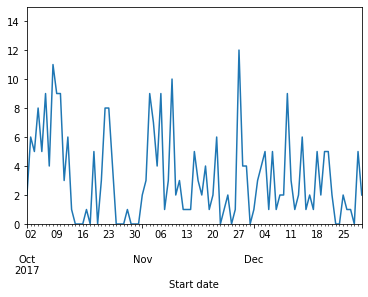

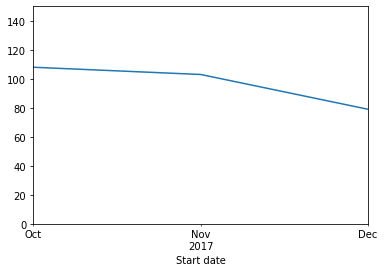

In [10]:
# Resample rides to daily, take the size, plot the results
rides.resample('D', on= 'Start date')\
  .size()\
  .plot(ylim = [0, 15])

# Show the results
plt.show()

# Resample rides to monthly, take the size, plot the results
rides.resample('M', on = 'Start date')\
  .size()\
  .plot(ylim = [0, 150])

# Show the results
plt.show()

### Members vs casual riders over time
Instructions:
<ul>
<li>Set monthly_rides to be a resampled version of rides, by month, based on start date.</li>
<li>Use the method .value_counts() to find out how many Member and Casual rides there were, and divide them by the total number of rides per month.</li>
</ul>

In [14]:
# Resample rides to be monthly on the basis of Start date
monthly_rides = rides.resample('M', on= 'Start date')['Member type']

# Take the ratio of the .value_counts() over the total number of rides
print(monthly_rides.value_counts() / monthly_rides.size())

Start date  Member type
2017-10-31  Member         0.768519
            Casual         0.231481
2017-11-30  Member         0.825243
            Casual         0.174757
2017-12-31  Member         0.860759
            Casual         0.139241
Name: Member type, dtype: float64


### Combining groupby() and resample()
Instructions:
<ul>
<li>Complete the .groupby() call to group by 'Member type', and the .resample() call to resample according to 'Start date', by month.</li>
<li>Print the median Duration for each group.</li>
</ul>

In [15]:
# Group rides by member type, and resample to the month
grouped = rides.groupby('Member type')\
  .resample('M', on='Start date')

# Print the median duration for each group
print(grouped['Duration'].median())

Member type  Start date
Casual       2017-10-31    1636.0
             2017-11-30    1159.5
             2017-12-31     850.0
Member       2017-10-31     671.0
             2017-11-30     655.0
             2017-12-31     387.5
Name: Duration, dtype: float64
